In [172]:
# necessary imports library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [173]:
# Loading data Chronic Kidney Disease

ckdDataFrame= pd.read_csv('https://raw.githubusercontent.com/FaddliLWibowo/Chronic-Kidney-Disease-With-ML/main/dataset/chronic_kidney_disease_dataset.csv')
ckdDataFrame

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [174]:
# Menampilkan jumlah baris dan kolom data. Ada 400 jumlah data dan terdapat 26 kolom

ckdDataFrame.shape

(400, 26)

In [175]:
# Hapus kolom id

ckdDataFrame.drop('id', axis = 1, inplace = True)

In [176]:
# Merubah nama kolom

ckdDataFrame.columns= ['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']

In [177]:
# Menampilkan 10 data teratas

ckdDataFrame.head(10)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [178]:
# Menampilkan 10 data terbawah

ckdDataFrame.tail(10)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,...,52,6300,5.3,no,no,no,good,no,no,notckd
391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,85.0,...,44,5800,6.3,no,no,no,good,no,no,notckd
392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,...,46,6600,5.5,no,no,no,good,no,no,notckd
393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,117.0,...,54,7400,5.4,no,no,no,good,no,no,notckd
394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,137.0,...,45,9500,4.6,no,no,no,good,no,no,notckd
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [179]:
# Menampilkan jumlah data per kolom, nilai mean per kolom, nilai standar deviasi per kolom, nalai min, 25%, 50%, 75% dan max per kolom

ckdDataFrame.describe()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms)
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [180]:
# Menampilkan info dari data, termasuk diantaranya jumlah baris data, jumlah kolom, no, nama kolom, jumlah missing data dan tipe data
# Kalau kita lihat pada Non-Null terdapat banyak missing data

ckdDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [181]:
# Menampilkan data-data unik pada setiap kolom

for i in ckdDataFrame:
    print('"{}": \n'.format(i),ckdDataFrame[i].unique())

"Age (yrs)": 
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
"Blood Pressure (mm/Hg)": 
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
"Specific Gravity": 
 [1.02  1.01  1.005 1.015   nan 1.025]
"Albumin": 
 [ 1.  4.  2.  3.  0. nan  5.]
"Sugar": 
 [ 0.  3.  4.  1. nan  2.  5.]
"Red Blood Cells": 
 [nan 'normal' 'abnormal']
"Pus Cells": 
 ['normal' 'abnormal' nan]
"Pus Cell Clumps": 
 ['notpresent' 'present' nan]
"Bacteria": 
 ['notpresent' 'present' nan]
"Blood Glucose Random (mgs/dL)": 
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  8

In [182]:
# Convert tipe data object ke float pada kolom Packed Cell Volume, White Blood Cells (cells/cmm) dan Red Blood Cells (millions/cmm)

ckdDataFrame['Packed Cell Volume'] = pd.to_numeric(ckdDataFrame['Packed Cell Volume'], errors='coerce')
ckdDataFrame['White Blood Cells (cells/cmm)'] = pd.to_numeric(ckdDataFrame['White Blood Cells (cells/cmm)'], errors='coerce')
ckdDataFrame['Red Blood Cells (millions/cmm)'] = pd.to_numeric(ckdDataFrame['Red Blood Cells (millions/cmm)'], errors='coerce')

In [183]:
# Ganti nilai yang typo pada data

ckdDataFrame=ckdDataFrame.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan, 'ckd\t':"ckd", "\tyes":"yes", "\tno":"no"," yes":"yes"})

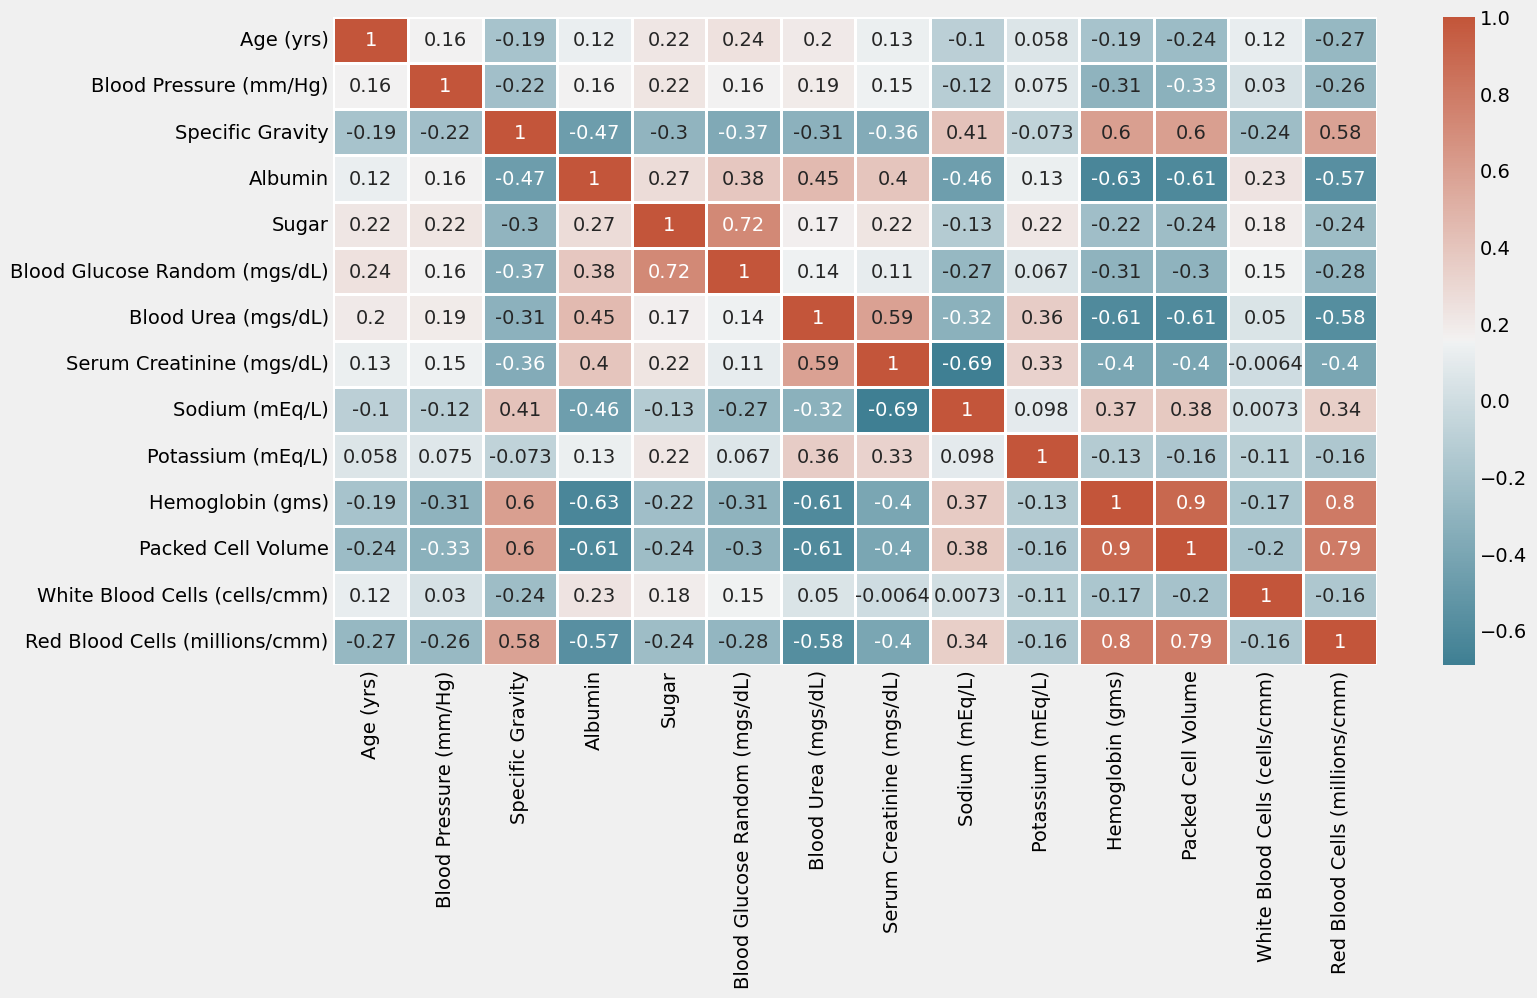

In [184]:
# Menampilkan korelasi data menggunakan heatmap

plt.figure(figsize = (15, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(ckdDataFrame.corr(), cmap=cmap, annot = True, linewidths = 2)
plt.show()

In [185]:
# Membagi 2 jenis kolom yaitu numrikal dan kategorial

num_cols = [col for col in ckdDataFrame.columns if ckdDataFrame[col].dtype != 'object']
cat_cols = [col for col in ckdDataFrame.columns if ckdDataFrame[col].dtype == 'object']

In [186]:
# n_rows, n_cols = (7,2)

# figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30))
# figure.subplots_adjust(hspace=0.5, wspace=0.3)

# for index, column in enumerate(num_cols):
#     i,j = (index // n_cols), (index % n_cols)
#     miss_perc="%.2f"%(100*(1-(ckdDataFrame[column].dropna().shape[0])/ckdDataFrame.shape[0]))
#     collabel=column+"\n({}% is missing)".format(miss_perc)
#     fig=sns.distplot(ckdDataFrame[column], color="steelblue", label=collabel, norm_hist=True,
#     ax=axes[i,j], kde_kws={"lw":4})
#     fig=fig.legend(loc='best', fontsize=10)
#     axes[i,j].set_ylabel("Density")
#     axes[i,j].set_xlabel(None)
# plt.show()

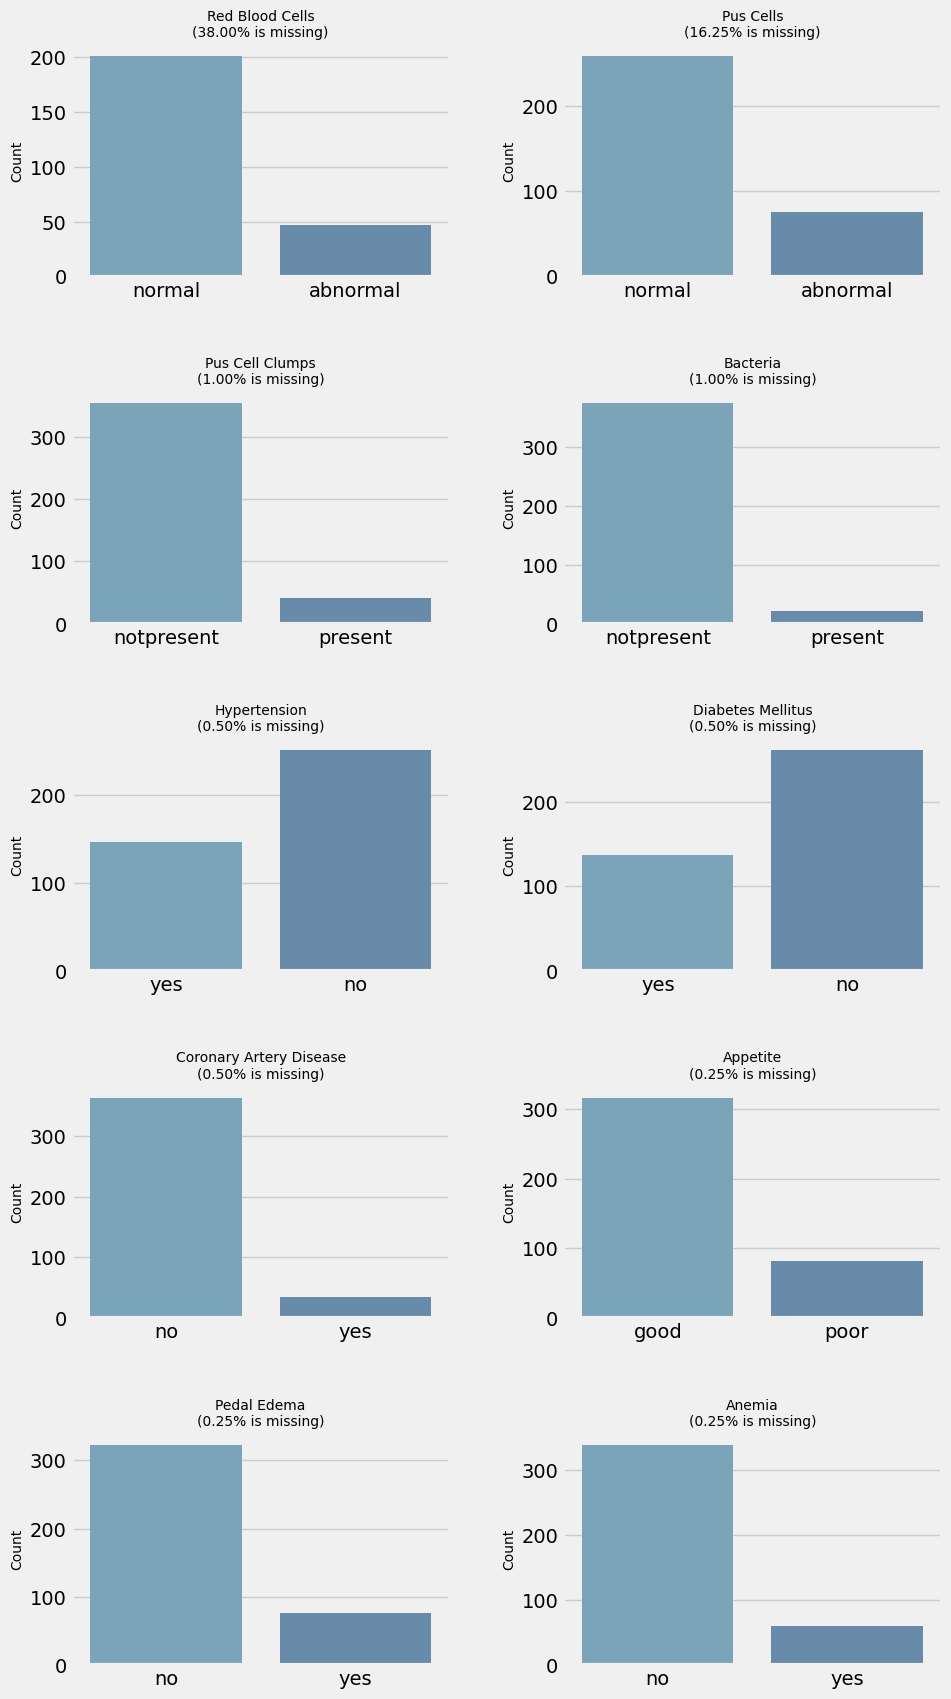

In [187]:
n_rows, n_cols = (5, 2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10, 20))
figure.subplots_adjust(hspace=0.5, wspace=0.3)

for index, column in enumerate(cat_cols):
   if index < n_rows * n_cols:
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(ckdDataFrame[column].dropna().shape[0])/ckdDataFrame.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=ckdDataFrame, label=collabel, palette=sns.cubehelix_palette(rot=-.2,light=0.6,hue=1),
    ax=axes[i,j])
    axes[i,j].set_title(collabel,fontsize=10)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=10)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels())
plt.show()

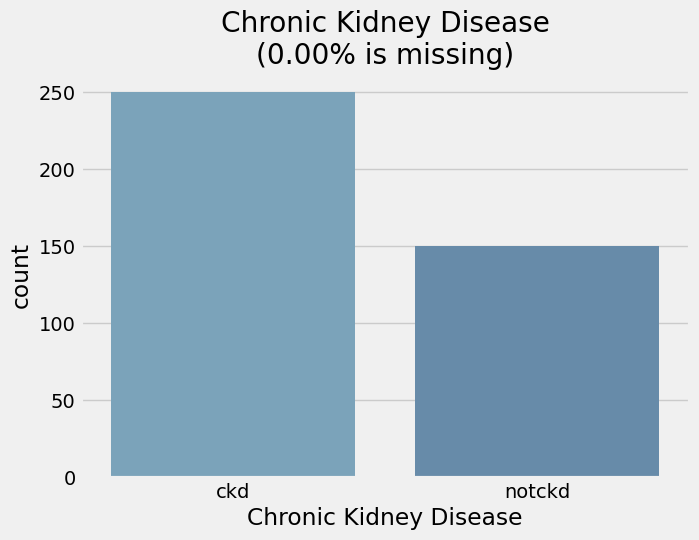

In [188]:
plt.figure(figsize = (7, 5))
miss_perc="%.2f"%(100*(1-(ckdDataFrame['Chronic Kidney Disease'].dropna().shape[0])/ckdDataFrame.shape[0]))
label="Chronic Kidney Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=ckdDataFrame['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.2,light=0.6,hue=1))
plt.title("Chronic Kidney Disease\n({}% is missing)".format(miss_perc))
plt.show()

In [189]:
# Melihat outlier

def outlier(col):
    height = 600
    width = 1000
    fig = px.violin(ckdDataFrame, y=col, x="Chronic Kidney Disease", color="Chronic Kidney Disease", box=True, template = 'seaborn', height=height, width=width)
    return fig.show()

In [190]:
outlier('Red Blood Cells (millions/cmm)')

In [191]:
outlier('White Blood Cells (cells/cmm)')

In [192]:
outlier('Packed Cell Volume')

In [193]:
# Menampilkan missing value pada setiap kolom

ckdDataFrame.isna().sum().sort_values(ascending = False)

Red Blood Cells                   152
Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Pus Cells                          65
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
Bacteria                            4
Pus Cell Clumps                     4
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
dtype: int64

In [194]:
# Normalisasi data (Ketegorial ke numerikal)

ckdDataFrame= ckdDataFrame.replace({'yes': 1 , 'no': 0, 'present': 1 , 'notpresent': 0, 'normal': 1, 'abnormal': 0, "good": 1, "poor": 0, 'ckd': 0, 'notckd': 1})

In [195]:
# Mengisi missing values

def random_value_imputation(feature):
    random_sample = ckdDataFrame[feature].dropna().sample(ckdDataFrame[feature].isna().sum())
    random_sample.index = ckdDataFrame[ckdDataFrame[feature].isnull()].index
    ckdDataFrame.loc[ckdDataFrame[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = ckdDataFrame[feature].mode()[0]
    ckdDataFrame[feature] = ckdDataFrame[feature].fillna(mode)

In [196]:
# Proses imputasi data untuk kolom numerikal

for col in num_cols:
    random_value_imputation(col)

In [197]:
# Proses imputasi data untuk kolom kagetoriaal

for col in cat_cols:
    impute_mode(col)

In [208]:
# Simpan dataframe ke CSV

ckdDataFrame.to_csv('chronic_kidney_disease_dataset_after_preprocessing.csv')

In [198]:
# Menentukan mana kolom variabel dan class

variable = [col for col in ckdDataFrame.columns if col != 'Chronic Kidney Disease']
classes = 'Chronic Kidney Disease'

X = ckdDataFrame[variable]
y = ckdDataFrame[classes]

In [199]:
#------------------------Algoritme Decision Tree-----------------------

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20)

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

DTmodel=  DecisionTreeClassifier(max_depth=3, random_state=1234)
DTmodel.fit(X_train, y_train)
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)

y_pred =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 f1 score:  0.9863013698630138 

[[43  0]
 [ 1 36]]
 precision score:  1.0 

 recall score:  0.972972972972973 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.99        37

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [200]:
#------------------------Algoritme Naive Bayes-----------------------
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=82)

NBmodel=  GaussianNB()
NBmodel.fit(X_train, y_train)
trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)

y_pred =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 f1 score:  1.0 

[[50  0]
 [ 0 30]]
 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



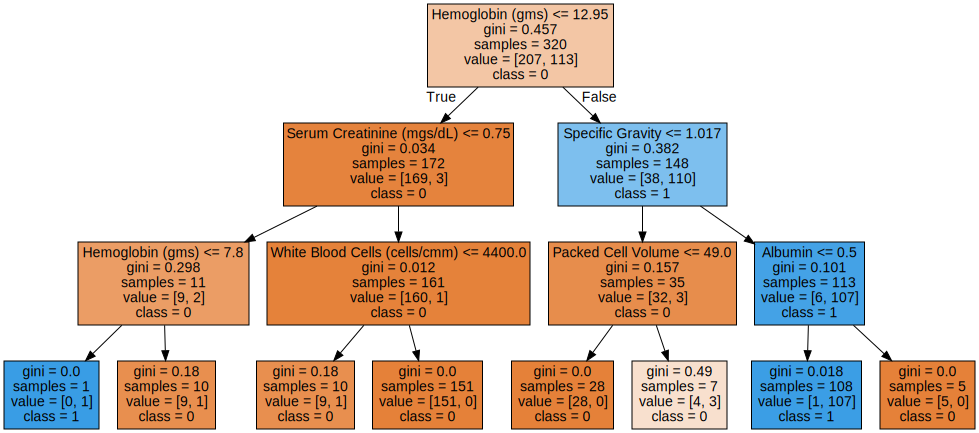

In [201]:
# Membuat Grafik Pohon Keputusan

graphtree = tree.export_graphviz(DTmodel, out_file=None,
                                feature_names=X.columns.astype(str),
                                class_names=y.unique().astype(str),
                                filled=True)

graph = graphviz.Source(graphtree, format="png")
graph

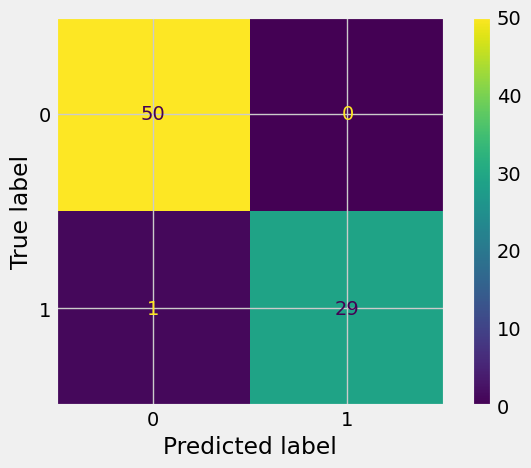

In [209]:
# Membuat Confusion Matrix Algoritme Decision Tree

y_pred = DTmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

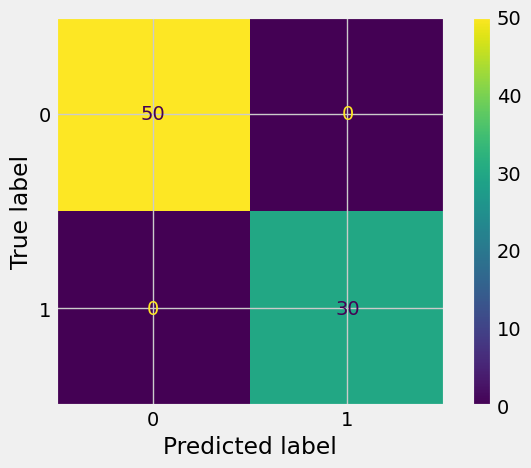

In [202]:
# Membuat Confusion Matrix Algoritme Naive Bayes

y_pred = NBmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [205]:
# Save the model Naive Bayes
import pickle
filename = 'finalized_model_NB.sav'
pickle.dump(NBmodel, open(filename, 'wb'))

In [206]:
# Save the model Naive Bayes
import pickle
filename = 'finalized_model_DT.sav'
pickle.dump(DTmodel, open(filename, 'wb'))

In [204]:
# Load the model and make predict
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0
